In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, feature
from skimage import data, transform

# Problem 3: A Simple Face Detector

We are going to build a simple facial detection algorithm.

Instead of using pixel intensities as features (as you did in Problem 2), we'll use the **HOG (Histrogram of Oriented Gradients) features**.
[HOG features](https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients) focus on the structure or the shape of an object, and they are widely used in computer vision tasks for object detection.

Text(0.5, 1.0, 'visualization of HOG features')

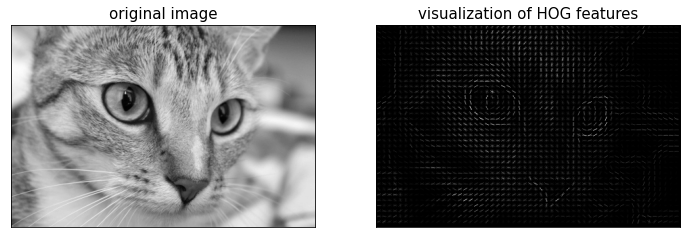

In [2]:
'visualization of HOG features'

image = color.rgb2gray(data.chelsea()) #load an image
hog_vec, hog_vis = feature.hog(image,visualize=True) #extract HOG features

'plot image and hog features'
fig, ax = plt.subplots(1,2, figsize = (12,6),
                       subplot_kw=dict(xticks=[],yticks=[]))
ax[0].imshow(image,cmap='gray')
ax[0].set_title('original image',fontsize=15)

ax[1].imshow(hog_vis,cmap = 'gray')
ax[1].set_title('visualization of HOG features',fontsize=15)

To build our face detector, we need

1. **A set of face images**
2. **A set of nonface images**
3. **To extract the HOG features from all the images**

## A set of face images

We'll use the Labeled Faces in the Wild dataset

In [3]:
#run this cell to load the labeled faces in the wild dataset
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people() 
positive_patches = faces.images/255

positive_patches.shape

(8211, 62, 47)

The positive_patches dataset contains 8211 images, and each image has 2914 (62x47) features. Each feature simply represents one pixel's intensity.

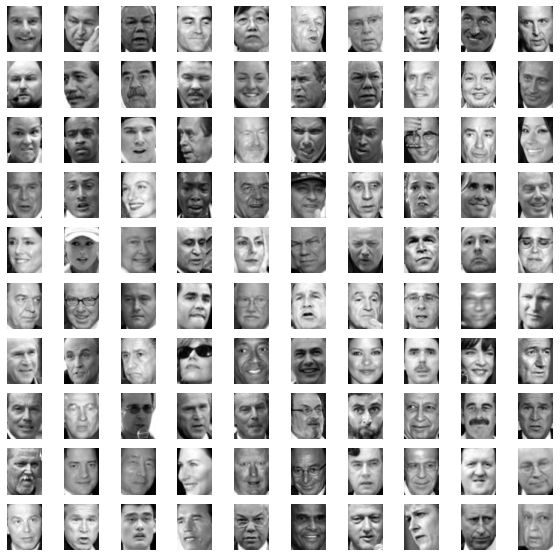

In [4]:
plt.figure(figsize=(10,10))
for i in range(100):
    face_image = positive_patches[i]
    plt.subplot(10,10,i+1)
    plt.imshow(face_image,cmap = 'gray')
    plt.axis('off')

This gives us a sample of 8211 face images.

## A set of nonface images

In [5]:
imgs_to_use = ['camera','text','coins','moon','page','clock','immunohistochemistry','chelsea','coffee','hubble_deep_field']
images = [color.rgb2gray(getattr(data,name)())/255 for name in imgs_to_use]

<ipython-input-5-d70807833f6d>:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  images = [color.rgb2gray(getattr(data,name)())/255 for name in imgs_to_use]


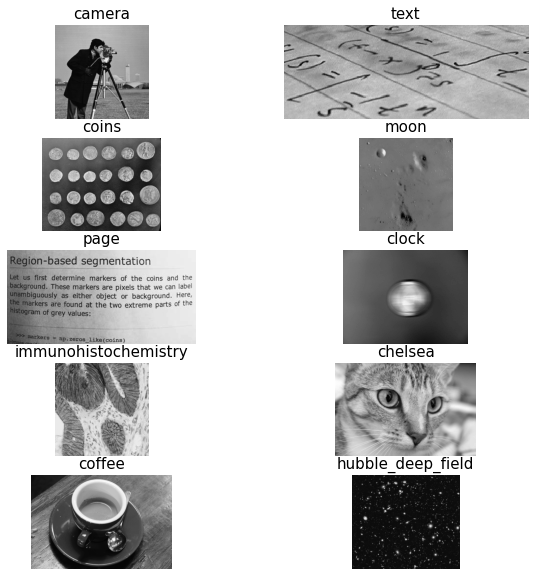

In [6]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(imgs_to_use[i],fontsize=15)
    plt.axis('off')

We'll extract 62x47 thumbnails from these 10 images

In [7]:
from sklearn.feature_extraction.image import PatchExtractor
def extract_patches(img,N,scale=1.0,patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale*np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,max_patches=N,random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale !=1:
        patches = np.array([transform.resize(patch,patch_size) for patch in patches])
    return patches

negative_patches = np.vstack([extract_patches(im,500,scale) for im in images for scale in [1.0, 2.0]])

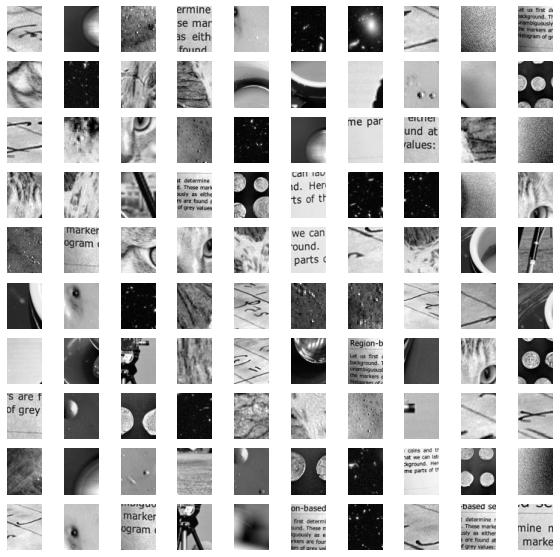

In [8]:
'display 100 (randomly chosen) nonface images'
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(negative_patches[np.random.randint(10000)],cmap='gray')
    plt.axis('off')

In [9]:
negative_patches.shape

(10000, 62, 47)

This gives us a sample of 10,000 nonface images

## Combine sets and extract HOG features

In [10]:
hog_positive_patches = np.array([feature.hog(img) for img in positive_patches])
hog_negative_patches = np.array([feature.hog(img) for img in negative_patches])

'feature matrix'
X = np.r_[hog_positive_patches, hog_negative_patches]

'label vector'
y = np.zeros(X.shape[0]) # 1 = face; 0 = nonface
y[:positive_patches.shape[0]]=1

## Part 1

Fit a logistic regression model to the data

## Part 2

Using the logistic regression model, write a function that classifies a set of images as a face/nonface images.

In [ ]:
def face_classifier(X,theta):
    p = 
    
    return p

## Part 3

 Now that we have a logistic regression model in place, let's grab a new image and see how the model does.

<ipython-input-11-db50d4bb775d>:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  new_image = color.rgb2gray(new_image)/255 #transform image into gray scale


(-0.5, 367.5, 183.5, -0.5)

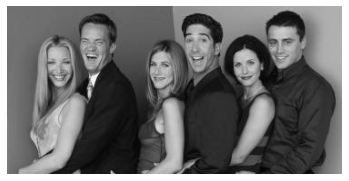

In [11]:
import matplotlib.image as mpimg 
from skimage import io

url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice-bis/master/Classification/Homework/Images/friends.jpg'
new_image = io.imread(url)

new_image = color.rgb2gray(new_image)/255 #transform image into gray scale
plt.imshow(new_image,cmap='gray')
plt.axis('off')

We will pass a sliding window across the image, using the classifier function to evaluate whether that window contains a face or not.

In [ ]:
def sliding_window(img,patch_size=positive_patches[0].shape,
                  istep=2,jstep=2,scale=1.0):
    Ni,Nj = (int(scale*s) for s in patch_size)
    for i in range(0,img.shape[0]-Ni,istep):
        for j in range(0,img.shape[1]-Ni,jstep):
            patch = img[i:i+Ni,j:j+Nj]
            if scale !=1:
                patch - transform.resize(patch,patch_size)
            yield(i,j), patch
            
indices, patches = zip(*sliding_window(new_image)) #apply sliding_window to new_image
patches_hog = np.array([feature.hog(patch) for patch in patches]) #extract HOG features

Finally, we can take the HOG features patches and use the classifier function to evaluate whether each patch contains a face.

In [ ]:
labels = face_classifier(patches_hog,theta)

In [ ]:
'draw a red rectangle where the classifier function has found a face'
fig, ax = plt.subplots()
ax.imshow(new_image,cmap='gray')
ax.axis('off')

Ni,Nj = positive_patches[0].shape
indices = np.array(indices)
for i,j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j,i), Nj,Ni,edgecolor='red',alpha=0.3,lw=2,facecolor='none'))

## Part 4

Test the face detector on the following image.

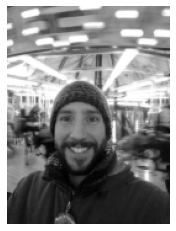

In [12]:
# run this cell to load the image
import matplotlib.image as mpimg 
from skimage import transform
from skimage import io

url = 'https://raw.githubusercontent.com/um-perez-alvaro/log-regress/master/yourfavouriteprofessor.jpg'
new_image = io.imread(url)

new_image = color.rgb2gray(new_image) #transform image into gray scale
s = 3.25 # scale new_image
new_image = transform.resize(new_image, (new_image.shape[0]//s, new_image.shape[1]//s))

plt.imshow(new_image,cmap='gray')
plt.axis('off')
plt.show()